In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"data\india-districts-census-2011.csv")

In [3]:
cols = [
    "District code",
    "State name",
    "District name",
    "Population",
    "Male",
    "Female",
    "Literate",
    "Male_Literate",
    "Female_Literate",
    "Hindus",
    "Muslims",
    "Christians",
    "Sikhs",
    "Buddhists",
    "Jains",
    "Others_Religions",
    "Religion_Not_Stated",
    "Households",
    "Below_Primary_Education",
    "Primary_Education",
    "Middle_Education",
    "Secondary_Education",
    "Higher_Education",
    "Graduate_Education",
    "Other_Education",
    "Literate_Education",
    "Illiterate_Education",
    "Total_Education",
    "Age_Group_0_29",
    "Age_Group_30_49",
    "Age_Group_50",
    "Age not stated",
    "Total_Power_Parity",
]

In [4]:
df = df[cols]

In [5]:
df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Hindus,...,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,37128,...,21751,6402,405015,289765,694780,600759,178435,89679,1481,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,10110,...,27950,6857,374972,342646,717618,503223,160933,88978,611,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,22882,...,6197,575,75493,32637,108130,70703,41515,21019,250,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,10341,...,3077,408,82938,39854,122792,87532,35561,17488,221,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,32604,...,13962,1884,288430,164044,452474,304979,109818,61334,704,629


In [6]:
df1 = pd.read_csv(r'data\district wise centroids.csv')
df1.head()

,State,District,Latitude,Longitude
0,Andaman and Nicobar,Andaman Islands,12.382571,92.822911
1,Andaman and Nicobar,Nicobar Islands,7.835291,93.511601
2,Andhra Pradesh,Adilabad,19.284514,78.813212
3,Andhra Pradesh,Anantapur,14.312066,77.460158
4,Andhra Pradesh,Chittoor,13.331093,78.927639


In [7]:
# merge both
final_df = df1.merge(df, left_on = 'District', right_on="District name")

In [8]:
final_df.drop(columns = ['State name', 'District name'], inplace = True)

In [9]:
final_df.rename(columns=lambda col: ' '.join(word.title() for word in col.split('_')), inplace=True)

In [10]:
final_df.columns

Index(['State', 'District', 'Latitude', 'Longitude', 'District Code',
       'Population', 'Male', 'Female', 'Literate', 'Male Literate',
       'Female Literate', 'Hindus', 'Muslims', 'Christians', 'Sikhs',
       'Buddhists', 'Jains', 'Others Religions', 'Religion Not Stated',
       'Households', 'Below Primary Education', 'Primary Education',
       'Middle Education', 'Secondary Education', 'Higher Education',
       'Graduate Education', 'Other Education', 'Literate Education',
       'Illiterate Education', 'Total Education', 'Age Group 0 29',
       'Age Group 30 49', 'Age Group 50', 'Age Not Stated',
       'Total Power Parity'],
      dtype='object')

In [11]:
final_df.to_csv('indiaDetailed.csv', index=False)

In [12]:
final_df.head()

,State,District,Latitude,Longitude,District Code,Population,Male,Female,Literate,Male Literate,...,Graduate Education,Other Education,Literate Education,Illiterate Education,Total Education,Age Group 0 29,Age Group 30 49,Age Group 50,Age Not Stated,Total Power Parity
0,Andhra Pradesh,Adilabad,19.284514,78.813212,532,2741239,1369597,1371642,1483347,856350,...,100226,19277,1346992,1030640,2377632,1536378,704551,422522,77788,4181
1,Andhra Pradesh,Anantapur,14.312066,77.460158,553,4081148,2064495,2016653,2310960,1338474,...,144915,23341,2426929,1369069,3795998,2189396,1104565,739612,47575,5799
2,Andhra Pradesh,Chittoor,13.331093,78.927639,554,4174064,2090204,2083860,2667878,1484794,...,246409,36017,3062955,1170993,4233948,2148179,1159053,807430,59402,5926
3,Andhra Pradesh,East Godavari,16.782718,82.243207,545,5154296,2569688,2584608,3288577,1716933,...,263023,47702,3518619,1524603,5043222,2724328,1478954,948122,2892,7211
4,Andhra Pradesh,Guntur,15.884926,80.586576,548,4887813,2440521,2447292,2960441,1634726,...,221924,30279,3209266,1474349,4683615,2583462,1371811,928462,4078,6981


In [13]:
cols = list(final_df.columns)
cols.insert(0, 'Overall India')

In [14]:
final_df['Population'].sum()

1020091931

In [15]:
final_df[final_df['State'] == 'Bihar']['Population'].sum()

105473507

In [16]:
# sex ratio
((final_df['Female'] / final_df['Male']) * 100).mean().astype(int)

94

In [17]:
final_df['Sex Ratio'] = ((final_df['Female'] / final_df['Male'])*100).astype(int)

In [18]:
final_df['Sex Ratio']

0      100
1       97
2       99
3      100
4      100
      ... 
512     94
513     95
514     94
515     95
516     93
Name: Sex Ratio, Length: 517, dtype: int32

In [19]:
final_df['Literacy Rate'] = ((final_df['Literate'] / final_df['Population']) * 100).astype(int)

In [34]:
final_df.to_csv('indiaDetailed.csv', index=False)

In [21]:
final_df.columns

Index(['State', 'District', 'Latitude', 'Longitude', 'District Code',
       'Population', 'Male', 'Female', 'Literate', 'Male Literate',
       'Female Literate', 'Hindus', 'Muslims', 'Christians', 'Sikhs',
       'Buddhists', 'Jains', 'Others Religions', 'Religion Not Stated',
       'Households', 'Below Primary Education', 'Primary Education',
       'Middle Education', 'Secondary Education', 'Higher Education',
       'Graduate Education', 'Other Education', 'Literate Education',
       'Illiterate Education', 'Total Education', 'Age Group 0 29',
       'Age Group 30 49', 'Age Group 50', 'Age Not Stated',
       'Total Power Parity', 'Sex Ratio', 'Literacy Rate'],
      dtype='object')

In [22]:
final_df[final_df['State'] == 'Bihar']['Literacy Rate'].mean()

50.054054054054056

In [23]:
import millify
millify.millify(123456789)


'123M'

In [33]:
final_df.groupby('State')['Literacy Rate'].mean().sort_values(ascending=False).head(10).reset_index()

,State,Literacy Rate
0,Kerala,83.230769
1,Goa,79.500000
2,Sikkim,79.000000
3,Puducherry,78.000000
4,Chandigarh,76.000000
5,Mizoram,74.625000
6,Tripura,74.500000
7,Daman and Diu,72.500000
8,Tamil Nadu,70.600000
9,Himachal Pradesh,70.384615


In [38]:
final_df[final_df['State'] == 'Bihar'].groupby('District')['Literacy Rate'].mean().sort_values(ascending=False).reset_index().head(10)

,District,Literacy Rate
0,Aurangabad,62.0
1,Rohtas,60.0
2,Patna,59.0
3,Munger,58.0
4,Bhojpur,58.0
5,Buxar,58.0
6,Siwan,57.0
7,Vaishali,55.0
8,Saran,54.0
9,Jehanabad,54.0


In [39]:

final_df.columns

Index(['State', 'District', 'Latitude', 'Longitude', 'District Code',
       'Population', 'Male', 'Female', 'Literate', 'Male Literate',
       'Female Literate', 'Hindus', 'Muslims', 'Christians', 'Sikhs',
       'Buddhists', 'Jains', 'Others Religions', 'Religion Not Stated',
       'Households', 'Below Primary Education', 'Primary Education',
       'Middle Education', 'Secondary Education', 'Higher Education',
       'Graduate Education', 'Other Education', 'Literate Education',
       'Illiterate Education', 'Total Education', 'Age Group 0 29',
       'Age Group 30 49', 'Age Group 50', 'Age Not Stated',
       'Total Power Parity', 'Sex Ratio', 'Literacy Rate'],
      dtype='object')

In [50]:
religion = ['State', 'District' ,'Hindus', 'Muslims', 'Christians', 'Sikhs','Buddhists', 'Jains', 'Others Religions', 'Religion Not Stated']
religion_df = final_df[religion].groupby('State').sum().reset_index()

In [65]:
x = religion_df[religion_df['State'] == 'Bihar'][['Hindus', 'Muslims', 'Christians', 'Sikhs','Buddhists', 'Jains', 'Others Religions', 'Religion Not Stated']].sum()
x

Hindus                 86533796
Muslims                18124944
Christians               143441
Sikhs                     28566
Buddhists                326516
Jains                     49692
Others Religions          12848
Religion Not Stated      253704
dtype: int64

In [56]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x23b37911fd0>,
 [Text(-0.9295590327366061, 0.5881496447825038, 'Hindus'),
  Text(0.9150133294938453, -0.6105330513973736, 'Muslims'),
  Text(1.0989225550802244, -0.0486746128484985, 'Christians'),
  Text(1.099157507739602, -0.043043851821915884, 'Sikhs'),
  Text(1.0995512707261408, -0.03141660459898822, 'Buddhists'),
  Text(1.0998342728523516, -0.01909377540821275, 'Jains'),
  Text(1.099867932356276, -0.017044980913186077, 'Others Religions'),
  Text(1.0999685935748014, -0.008312228887216883, 'Religion Not Stated')])

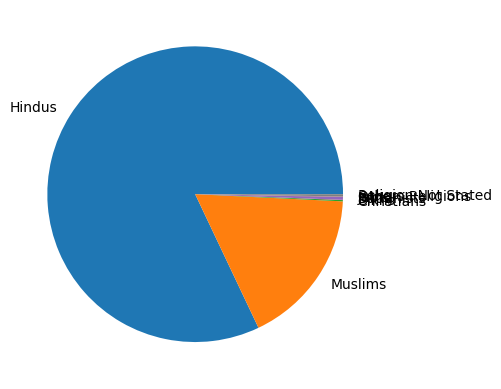

In [67]:
plt.pie(x, labels=x.index)

In [73]:
final_df[final_df['State'] == 'Bihar'].groupby('State')

,State,District,Latitude,Longitude,District Code,Population,Male,Female,Literate,Male Literate,...,Literate Education,Illiterate Education,Total Education,Age Group 0 29,Age Group 30 49,Age Group 50,Age Not Stated,Total Power Parity,Sex Ratio,Literacy Rate
52,Bihar,Araria,26.211528,87.307666,209,2811569,1463333,1348236,1195768,727643,...,1485840,1653766,3139606,1872943,612012,324091,2523,2035,92,42
53,Bihar,Aurangabad,24.774292,84.459860,235,2540073,1318684,1221389,1466002,868733,...,1833998,784131,2618129,1626969,564571,340948,7585,2215,92,57
54,Bihar,Aurangabad,24.774292,84.459860,515,3701282,1924469,1776813,2503837,1430936,...,2611982,819734,3431716,2211996,909771,571932,7583,8119,92,67
55,Bihar,Banka,24.832356,86.866492,225,2034763,1067140,967623,965321,590961,...,1214645,879831,2094476,1291235,462080,278863,2585,1738,90,47
56,Bihar,Begusarai,25.543026,86.125601,222,2970541,1567660,1402881,1548673,918507,...,1822334,1242551,3064885,1951688,644874,369996,3983,2354,89,52
57,Bihar,Bhagalpur,25.277193,87.042138,224,3037766,1615663,1422103,1573066,937669,...,1976417,1139715,3116132,1952879,674660,397654,12573,2814,88,51
58,Bihar,Bhojpur,25.506664,84.494078,231,2728407,1430380,1298027,1599151,973486,...,2172525,1005140,3177665,1722387,613072,387389,5559,2600,90,58
59,Bihar,Buxar,25.485930,84.088081,232,1706352,887977,818375,989807,593544,...,1344677,457814,1802491,1074754,375372,253998,2228,1556,92,58
60,Bihar,Darbhanga,26.146188,85.973874,215,3937385,2059949,1877436,1816634,1125566,...,2028545,2203198,4231743,2535344,865971,529314,6756,3514,91,46
61,Bihar,Gaya,24.726654,84.942912,236,4391418,2266566,2124852,2297613,1368803,...,2784730,1953368,4738098,2810026,936630,537333,107429,3998,93,52


In [81]:
final_df[religion].sum()[2:]

Hindus                 821271348
Muslims                139317340
Christians              22971390
Sikhs                   17597026
Buddhists                7675527
Jains                    3616195
Others Religions         5244864
Religion Not Stated      2398241
dtype: object

In [82]:
religion

['State',
 'District',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others Religions',
 'Religion Not Stated']

In [90]:
final_df[religion][final_df[religion]['State'] == 'Bihar'].sum()[2:]

Hindus                 86533796
Muslims                18124944
Christians               143441
Sikhs                     28566
Buddhists                326516
Jains                     49692
Others Religions          12848
Religion Not Stated      253704
dtype: object

In [101]:
# education
ed_cols = ['State', 'District','Below Primary Education', 'Primary Education',
       'Middle Education', 'Secondary Education', 'Higher Education',
       'Graduate Education', 'Other Education', 'Literate Education',
       'Illiterate Education']


import plotly.express as px
data = final_df[ed_cols].sum()
px.pie(values=data, labels=data.index, names=data.index)


In [106]:
# education
ed_cols = ['State', 'District','Below Primary Education', 'Primary Education',
       'Middle Education', 'Secondary Education', 'Higher Education',
       'Graduate Education', 'Other Education', 'Literate Education',
       'Illiterate Education']


import plotly.express as px
data = final_df[ed_cols].sum()[2:]
px.bar(data, x=data.index, y=data.values, color=data.index, hover_data=[data.index, data.values])


In [107]:
# age
final_df.columns

Index(['State', 'District', 'Latitude', 'Longitude', 'District Code',
       'Population', 'Male', 'Female', 'Literate', 'Male Literate',
       'Female Literate', 'Hindus', 'Muslims', 'Christians', 'Sikhs',
       'Buddhists', 'Jains', 'Others Religions', 'Religion Not Stated',
       'Households', 'Below Primary Education', 'Primary Education',
       'Middle Education', 'Secondary Education', 'Higher Education',
       'Graduate Education', 'Other Education', 'Literate Education',
       'Illiterate Education', 'Total Education', 'Age Group 0 29',
       'Age Group 30 49', 'Age Group 50', 'Age Not Stated',
       'Total Power Parity', 'Sex Ratio', 'Literacy Rate'],
      dtype='object')

In [109]:
age_cols = ['State', 'District', 'Age Group 0 29',
       'Age Group 30 49', 'Age Group 50', 'Age Not Stated']
age_cols

['State',
 'District',
 'Age Group 0 29',
 'Age Group 30 49',
 'Age Group 50',
 'Age Not Stated']

In [112]:
data = final_df[age_cols].sum()
data

State              Andhra PradeshAndhra PradeshAndhra PradeshAndh...
District           AdilabadAnantapurChittoorEast GodavariGunturHy...
Age Group 0 29                                             596901010
Age Group 30 49                                            257582112
Age Group 50                                               161715380
Age Not Stated                                               3893429
dtype: object